<a href="https://colab.research.google.com/github/abhiskp/Car-price-Perdiction---DS-casestudy/blob/main/Group_3_Project_(DS)_Final_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Price Prediction Group Project (Group 3)**

**Members:**
*Abhijith Shaji     (CB.EN.U4CSE19102)*,
*Deepthi        (CB.EN.U4CSE19108)*,
*Hrishikesh Menon  (CB.EN.U4CSE19117)*,
*Shrikarthik              (CB.EN.U4CSE19146)*

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from numpy import percentile 
from sklearn.feature_selection import VarianceThreshold
import scipy.stats as st

# **Preprocessing & EDA**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/abhiskp/Data-Science/main/CarPrice_Assignment(1).csv')

In [ ]:
df.set_index(['car_ID'],inplace=True)

In [ ]:
df.shape

(205, 25)

In [ ]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(1,"CompanyName",CompanyName)
df.head()

,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
carname = df['CarName'].apply(lambda x : x.split(' ')[-1])
df.drop(['CarName'],axis=1,inplace=True)
CarName = carname
df.insert(2,"CarName",CarName)
df.head()

,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df['symboling'].fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

symboling           0
CompanyName         0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df['CompanyName'] = df['CompanyName'].replace({'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen'})

In [ ]:
df.head()

,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Visualisation**

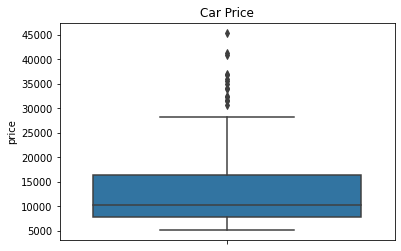

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [ ]:
plt.title('Car Price')
plt.ylabel("Price")
sns.boxplot(y=df.price)
plt.show()
print(df.price.describe())

*Inference* : the price of the car is mainly distributed around 7500 and a bit more than 1500 with an avg of 13276

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


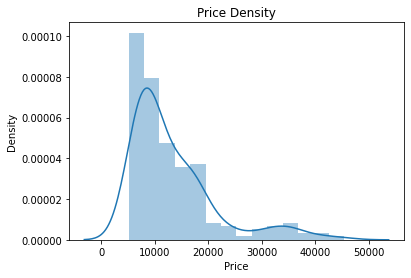

In [ ]:
sns.distplot(df['price'])
plt.title("Price Density")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

*Inference* : maximum no of cars been sold is in the range of 5000-10000 aprox

**Outliers**

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR) 

symboling              2.00
wheelbase              7.90
carlength             16.80
carwidth               2.80
carheight              3.50
curbweight           790.00
enginesize            44.00
boreratio              0.43
stroke                 0.30
compressionratio       0.80
horsepower            46.00
peakrpm              700.00
citympg               11.00
highwaympg             9.00
price               8715.00
dtype: float64


In [ ]:
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df2 = df

In [ ]:
Q1 = df['wheelbase'].quantile(0.25)
Q3 = df['wheelbase'].quantile(0.75)
IQR = Q3-Q1
df_now = df['wheelbase'][((df['wheelbase'] < (Q1 - 1.5 * IQR)) | (df['wheelbase'] > (Q3 + 1.5 * IQR)))]

In [ ]:
df_now

car_ID
71    115.6
72    115.6
74    120.9
Name: wheelbase, dtype: float64

In [ ]:
for i in df_now:
  df2.loc[(df2['wheelbase'] == i),['wheelbase']] = df1['wheelbase'].mean()

In [ ]:
Q1 = df['carlength'].quantile(0.25)
Q3 = df['carlength'].quantile(0.75)
IQR = Q3-Q1
df_now = df['carlength'][((df['carlength'] < (Q1 - 1.5 * IQR)) | (df['carlength'] > (Q3 + 1.5 * IQR)))]
if len(df_now) != 0:
  for i in df_now:
    df2.loc[(df2['carlength'] == i),['carlength']] = df1['carlength'].mean()

In [ ]:
Q1 = df['carwidth'].quantile(0.25)
Q3 = df['carwidth'].quantile(0.75)
IQR = Q3-Q1
df_now = df['carwidth'][((df['carwidth'] < (Q1 - 1.5 * IQR)) | (df['carwidth'] > (Q3 + 1.5 * IQR)))]
if len(df_now) != 0:
  for i in df_now:
    df2.loc[(df2['carwidth'] == i),['carwidth']] = df1['carwidth'].mean()

In [ ]:
Q1 = df['carheight'].quantile(0.25)
Q3 = df['carheight'].quantile(0.75)
IQR = Q3-Q1
df_now = df['carheight'][((df['carheight'] < (Q1 - 1.5 * IQR)) | (df['carheight'] > (Q3 + 1.5 * IQR)))]
if len(df_now) != 0:
  for i in df_now:
    df2.loc[(df2['carheight'] == i),['carheight']] = df1['carheight'].mean()

In [ ]:
Q1 = df['curbweight'].quantile(0.25)
Q3 = df['curbweight'].quantile(0.75)
IQR = Q3-Q1
df_now = df['curbweight'][((df['curbweight'] < (Q1 - 1.5 * IQR)) | (df['curbweight'] > (Q3 + 1.5 * IQR)))]
if len(df_now) != 0:
  for i in df_now:
    df2.loc[(df2['curbweight'] == i),['curbweight']] = df1['curbweight'].mean()

Q1 = df['enginesize'].quantile(0.25)
Q3 = df['enginesize'].quantile(0.75)
IQR = Q3-Q1
df_now = df['enginesize'][((df['enginesize'] < (Q1 - 1.5 * IQR)) | (df['enginesize'] > (Q3 + 1.5 * IQR)))]
if len(df_now) != 0:
  for i in df_now:
    df2.loc[(df2['enginesize'] == i),['enginesize']] = df1['enginesize'].mean()

Q1 = df['boreratio'].quantile(0.25)
Q3 = df['boreratio'].quantile(0.75)
IQR = Q3-Q1
df_now = df['boreratio'][((df['boreratio'] < (Q1 - 1.5 * IQR)) | (df['boreratio'] > (Q3 + 1.5 * IQR)))]
if len(df_now) != 0:
  for i in df_now:
    df2.loc[(df2['boreratio'] == i),['boreratio']] = df1['boreratio'].mean()

Q1 = df['stroke'].quantile(0.25)
Q3 = df['stroke'].quantile(0.75)
IQR = Q3-Q1
df_now = df['stroke'][((df['stroke'] < (Q1 - 1.5 * IQR)) | (df['stroke'] > (Q3 + 1.5 * IQR)))]
if len(df_now) != 0:
  for i in df_now:
    df2.loc[(df2['stroke'] == i),['stroke']] = df1['stroke'].mean()

Q1 = df['compressionratio'].quantile(0.25)
Q3 = df['compressionratio'].quantile(0.75)
IQR = Q3-Q1
df_now = df['compressionratio'][((df['compressionratio'] < (Q1 - 1.5 * IQR)) | (df['compressionratio'] > (Q3 + 1.5 * IQR)))]
if len(df_now) != 0:
  for i in df_now:
    df2.loc[(df2['compressionratio'] == i),['compressionratio']] = df1['compressionratio'].mean()

In [ ]:
Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)
IQR = Q3-Q1
df_now = df['horsepower'][((df['horsepower'] < (Q1 - 1.5 * IQR)) | (df['curbweight'] > (Q3 + 1.5 * IQR)))]
if len(df_now) != 0:
  for i in df_now:
    df2.loc[(df2['horsepower'] == i),['horsepower']] = df1['horsepower'].mean()

Q1 = df['peakrpm'].quantile(0.25)
Q3 = df['peakrpm'].quantile(0.75)
IQR = Q3-Q1
df_now = df['peakrpm'][((df['peakrpm'] < (Q1 - 1.5 * IQR)) | (df['peakrpm'] > (Q3 + 1.5 * IQR)))]
if len(df_now) != 0:
  for i in df_now:
    df2.loc[(df2['peakrpm'] == i),['peakrpm']] = df1['peakrpm'].mean()

Q1 = df['citympg'].quantile(0.25)
Q3 = df['citympg'].quantile(0.75)
IQR = Q3-Q1
df_now = df['citympg'][((df['citympg'] < (Q1 - 1.5 * IQR)) | (df['citympg'] > (Q3 + 1.5 * IQR)))]
if len(df_now) != 0:
  for i in df_now:
    df2.loc[(df2['citympg'] == i),['citympg']] = df1['citympg'].mean()

Q1 = df['highwaympg'].quantile(0.25)
Q3 = df['highwaympg'].quantile(0.75)
IQR = Q3-Q1
df_now = df['highwaympg'][((df['highwaympg'] < (Q1 - 1.5 * IQR)) | (df['highwaympg'] > (Q3 + 1.5 * IQR)))]
if len(df_now) != 0:
  for i in df_now:
    df2.loc[(df2['highwaympg'] == i),['highwaympg']] = df1['highwaympg'].mean()

In [ ]:
df2

,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130.0,mpfi,3.47,2.68,9.000000,96.94964,5000.0,21.0,27.0,13495.0
2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130.0,mpfi,3.47,2.68,9.000000,96.94964,5000.0,21.0,27.0,16500.0
3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152.0,mpfi,2.68,3.47,9.000000,96.94964,5000.0,19.0,26.0,16500.0
4,2,audi,ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109.0,mpfi,3.19,3.40,10.000000,96.94964,5500.0,24.0,30.0,13950.0
5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136.0,mpfi,3.19,3.40,8.000000,96.94964,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo,(sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141.0,mpfi,3.78,3.15,9.500000,96.94964,5400.0,23.0,28.0,16845.0
202,-1,volvo,144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141.0,mpfi,3.78,3.15,8.700000,96.94964,5300.0,19.0,25.0,19045.0
203,-1,volvo,244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173.0,mpfi,3.58,2.87,8.800000,96.94964,5500.0,18.0,23.0,21485.0


In [ ]:
df_final = df2
label_encoder = preprocessing.LabelEncoder()
df3=['CompanyName','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
for column in df3:
  df_final[column]= label_encoder.fit_transform(df_final[column])
df_final.head(5)

,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,0,60,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130.0,5,3.47,2.68,9.0,96.94964,5000.0,21.0,27.0,13495.0
2,3,0,103,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130.0,5,3.47,2.68,9.0,96.94964,5000.0,21.0,27.0,16500.0
3,1,0,29,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152.0,5,2.68,3.47,9.0,96.94964,5000.0,19.0,26.0,16500.0
4,2,1,78,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109.0,5,3.19,3.40,10.0,96.94964,5500.0,24.0,30.0,13950.0
5,2,1,5,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136.0,5,3.19,3.40,8.0,96.94964,5500.0,18.0,22.0,17450.0


In [ ]:
X=df_final.drop(labels=['price'],axis=1)
y=df_final['price']
           

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df_final.drop(labels=['price'],axis=1),df_final['price'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((143, 25), (62, 25))

# **Feature Engineering**

**Feature selection using Variance Threshold**





In [ ]:
selector=VarianceThreshold(threshold=0.45)
selector.fit(X_train)

VarianceThreshold(threshold=0.45)

In [ ]:
sum(selector.get_support())

16

In [ ]:
selector.get_support(indices=True)

array([ 0,  1,  2,  6,  9, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23, 24])

In [ ]:
X_train.columns[selector.get_support()]

Index(['symboling', 'CompanyName', 'CarName', 'carbody', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'peakrpm', 'citympg',
       'highwaympg'],
      dtype='object')

 **Feature selection using corelation**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df_final.drop(labels=['price'], axis=1),
    df_final['price'],
    test_size=0.3,
    random_state=0)

In [ ]:
X_train.corr()

,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
symboling,1.000000e+00,-1.441980e-01,1.058395e-01,1.923986e-01,-6.521759e-02,6.886202e-01,-6.101090e-01,-3.454950e-02,2.679080e-01,-5.727159e-01,-4.059011e-01,-2.888542e-01,-5.920038e-01,-2.539860e-01,7.617039e-02,2.179539e-01,-9.899893e-02,6.763292e-02,-1.402890e-01,-1.091199e-01,1.514448e-01,3.976780e-17,2.546148e-01,-5.251590e-02,2.907300e-02
CompanyName,-1.441980e-01,1.000000e+00,-1.353611e-01,-9.903764e-02,-5.139994e-03,-1.563739e-01,1.340158e-01,-7.903566e-02,6.693429e-02,1.016694e-01,3.379245e-02,2.538510e-02,2.036667e-01,-8.746131e-02,-3.360415e-02,2.303783e-02,8.920170e-03,6.158360e-02,1.810812e-01,-9.285031e-02,1.433414e-01,7.924254e-17,-1.943367e-01,1.954595e-01,1.889938e-01
CarName,1.058395e-01,-1.353611e-01,1.000000e+00,1.787564e-01,-2.245780e-01,2.826942e-02,-1.549951e-02,-7.455291e-02,-9.465480e-03,-2.057856e-01,-6.898524e-02,-1.256556e-01,-1.955317e-01,-2.465705e-02,-4.158308e-02,1.010400e-01,-9.710588e-02,-8.494172e-02,-7.698675e-02,2.759093e-02,-1.582376e-01,-3.899558e-17,-7.208499e-02,-4.870160e-02,-6.639171e-02
fueltype,1.923986e-01,-9.903764e-02,1.787564e-01,1.000000e+00,-5.133216e-01,2.061631e-01,-1.542727e-01,-1.554719e-01,5.376948e-02,-3.489849e-01,-2.797877e-01,-3.222813e-01,-3.208862e-01,-2.864596e-01,1.056864e-01,1.558979e-01,-2.264074e-01,2.809305e-02,-7.086963e-02,-3.296146e-01,-3.156677e-02,1.415313e-16,5.269875e-01,-2.478945e-01,-1.578877e-01
aspiration,-6.521759e-02,-5.139994e-03,-2.245780e-01,-5.133216e-01,1.000000e+00,-1.270765e-02,7.387326e-02,1.480390e-01,-7.383175e-02,2.925400e-01,2.439503e-01,3.750282e-01,8.328307e-02,3.562116e-01,-1.202795e-01,-1.667429e-01,3.282972e-01,2.813317e-01,1.804383e-01,3.686157e-01,-2.791509e-01,1.303355e-16,-2.296524e-01,-1.674605e-01,-2.207187e-01
doornumber,6.886202e-01,-1.563739e-01,2.826942e-02,2.061631e-01,-1.270765e-02,1.000000e+00,-7.020851e-01,2.691640e-02,1.824577e-01,-5.034688e-01,-4.786836e-01,-2.508284e-01,-5.962985e-01,-2.422805e-01,8.317546e-02,1.543476e-01,-1.029870e-01,2.410620e-02,-1.919781e-01,-1.036357e-01,1.343923e-01,1.113409e-16,2.531057e-01,-5.207735e-03,1.424512e-02
carbody,-6.101090e-01,1.340158e-01,-1.549951e-02,-1.542727e-01,7.387326e-02,-7.020851e-01,1.000000e+00,-1.317664e-01,-3.255827e-01,4.583190e-01,3.500814e-01,1.452715e-01,6.174275e-01,1.407562e-01,-9.315229e-03,-4.934482e-02,-7.580335e-02,-1.215201e-01,4.402618e-02,1.344242e-01,-1.117363e-01,-8.446084e-17,-1.162512e-01,5.842621e-02,1.039559e-02
drivewheel,-3.454950e-02,-7.903566e-02,-7.455291e-02,-1.554719e-01,1.480390e-01,2.691640e-02,-1.317664e-01,1.000000e+00,1.721226e-01,4.462184e-01,5.338454e-01,4.998702e-01,4.487394e-02,5.920006e-01,-1.517380e-01,2.488552e-01,4.722488e-01,5.029194e-01,4.996072e-01,-1.653913e-01,-1.735041e-02,4.540603e-17,-5.499295e-02,-4.914636e-01,-5.149849e-01
enginelocation,2.679080e-01,6.693429e-02,-9.465480e-03,5.376948e-02,-7.383175e-02,1.824577e-01,-3.255827e-01,1.721226e-01,1.000000e+00,-2.327322e-01,-6.831643e-02,-5.841889e-02,-1.290517e-01,5.346644e-02,1.347916e-01,1.591536e-01,3.740313e-01,1.343500e-01,2.202424e-01,-2.690512e-01,1.666458e-01,-4.706309e-17,2.466117e-01,-1.962466e-01,-1.251259e-01
wheelbase,-5.727159e-01,1.016694e-01,-2.057856e-01,-3.489849e-01,2.925400e-01,-5.034688e-01,4.583190e-01,4.462184e-01,-2.327322e-01,1.000000e+00,8.158272e-01,7.983379e-01,6.094135e-01,7.045652e-01,-2.293130e-01,-2.369130e-02,4.012000e-01,3.342890e-01,4.978576e-01,1.871418e-01,-1.846265e-01,-1.132156e-15,-3.497423e-01,-3.648114e-01,-4.422555e-01


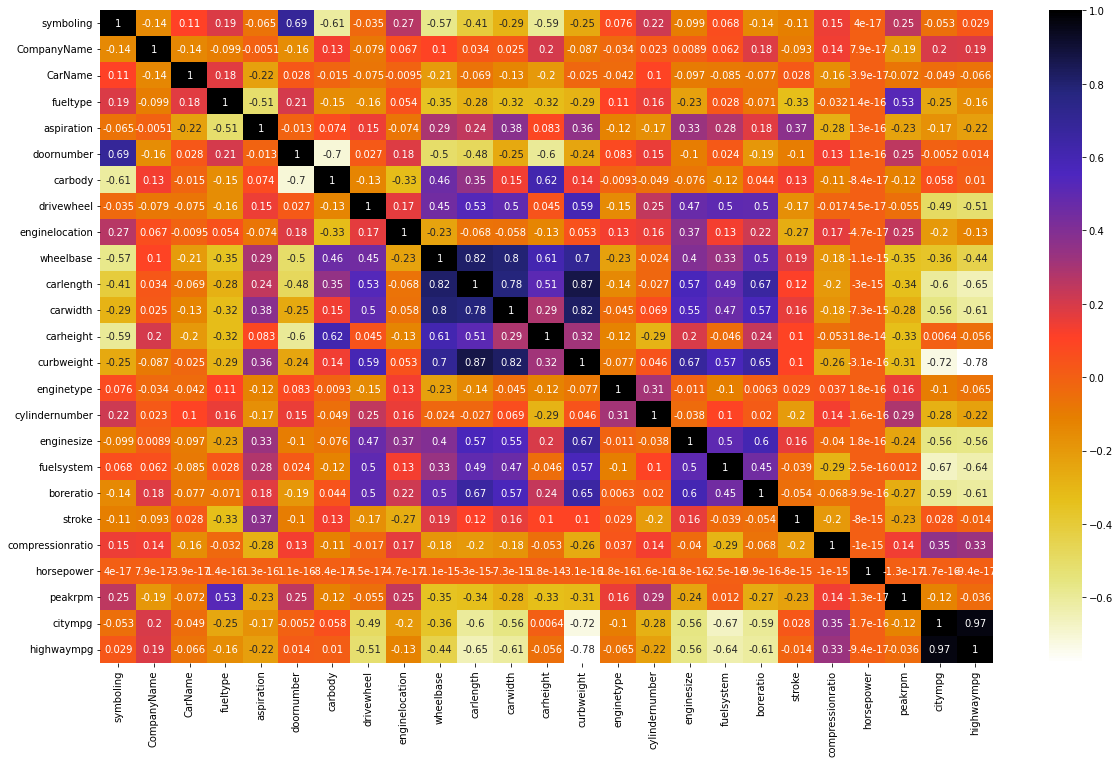

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(20,12))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

6

In [ ]:
corr_features

{'carbody', 'carlength', 'carwidth', 'citympg', 'curbweight', 'highwaympg'}

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)


,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm
car_ID,,,,,,,,,,,,,,,,,,,
53,1,9,45,1,0,1,1,0,93.1,54.1,3,2,91.0,1,3.03,3.150000,9.0,96.94964,5000.0
182,-1,19,106,1,0,0,2,0,104.5,54.1,0,3,161.0,5,3.27,3.350000,9.2,96.94964,5200.0
6,2,1,57,1,0,1,1,0,99.8,53.1,3,1,136.0,5,3.19,3.400000,8.5,96.94964,5500.0
19,2,4,70,1,0,1,1,0,88.4,53.2,2,4,61.0,1,2.91,3.030000,9.5,96.94964,5100.0
189,2,20,51,1,0,0,1,0,97.3,55.7,3,2,109.0,5,3.19,3.400000,10.0,96.94964,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-2,21,15,1,1,0,2,0,104.3,56.2,3,2,130.0,5,3.62,3.150000,7.5,96.94964,5100.0
144,0,18,32,1,0,0,1,0,97.2,52.5,4,2,108.0,5,3.62,3.266187,9.0,96.94964,5200.0
25,1,5,3,1,0,0,1,0,93.7,50.6,3,2,90.0,1,2.97,3.230000,9.4,96.94964,5500.0


# **Hypothesis Testing**

In [ ]:
s_ztest = df.sample(n=60, random_state=1)

print("Sample ztest mean")

print(s_ztest.mean())

print("\nSample ztest SD")

print(s_ztest.std())

Sample ztest mean
symboling               0.850000
CompanyName            11.783333
CarName                53.733333
fueltype                0.883333
aspiration              0.200000
doornumber              0.516667
carbody                 2.550000
drivewheel              1.300000
enginelocation          0.000000
wheelbase              98.387470
carlength             173.019820
carwidth               65.499916
carheight              53.801667
curbweight           2507.583333
enginetype              3.016667
cylindernumber          2.100000
enginesize            117.017506
fuelsystem              3.000000
boreratio               3.311333
stroke                  3.323369
compressionratio        8.916894
horsepower             96.949640
peakrpm              5115.833333
citympg                25.945444
highwaympg             31.202278
price               12660.958333
dtype: float64

Sample ztest SD
symboling           1.117276e+00
CompanyName         6.340859e+00
CarName             3.4104

In [ ]:

print("Population mean")
print(df.mean())
print("\nPopulation sd")
print(df.std())
print("\nPopulation var")
print(df.var())



Population mean
symboling               0.834146
CompanyName            12.219512
CarName                54.234146
fueltype                0.902439
aspiration              0.180488
doornumber              0.439024
carbody                 2.614634
drivewheel              1.326829
enginelocation          0.014634
wheelbase              98.468022
carlength             174.197508
carwidth               65.657852
carheight              53.724878
curbweight           2555.565854
enginetype              3.014634
cylindernumber          2.117073
enginesize            120.116266
fuelsystem              3.253659
boreratio               3.329756
stroke                  3.291677
compressionratio        8.925943
horsepower             96.949640
peakrpm              5111.663450
citympg                25.002211
highwaympg             30.447342
price               13276.710571
dtype: float64

Population sd
symboling           1.245307e+00
CompanyName         6.314131e+00
CarName             3.323348e+

**Horsepower**

*hypothesis: as the horsepower of the vehicle increases, sale increases*

In [ ]:
#H0 : μ =  104.117073 , Ha :  μ >  104.117073

n = 60

xbar =  97.733333  #sample mean

mu =  104.117073  #popln mean

sigma =  7988.852332 #pop SD 

alpha = 0.05

In [ ]:
z = (xbar- mu)/(sigma/np.sqrt(n))

z

-0.006189654703588316

In [ ]:
z_critical = abs(st.norm.ppf(alpha)) 
z_critical

1.6448536269514729

In [ ]:
if (z > z_critical): #right-tailed test

    print("Reject null hypothesis")

else:

    print("Null hypothesis cannot be rejected")

    

Null hypothesis cannot be rejected


inference : since z > z critical value : null hypothesis is cannot b  rejected hence we conclude that the avg horspower is greater than 104.11

**Car Price**

*hypothesis:when the price of car is decresing the selling rate increases*

In [ ]:
#H0 : μ =  13276.710571 , Ha :  μ < 13276.710571

n = 60

xbar =   12660.958333  #sample mean

mu =  13276.710571  #popln mean

sigma =  39.544167 #pop SD 

alpha = 0.05

In [ ]:
z = (xbar- mu)/(sigma/np.sqrt(n))

z

-120.61440885397548

In [ ]:
z_critical = (st.norm.ppf(alpha)) 
z_critical

-1.6448536269514729

In [ ]:
if (z < z_critical): #left-tailed test

    print("Reject null hypothesis")

else:

    print("Null hypothesis cannot be rejected")


Reject null hypothesis


inference : since z < z score value : null hypothesis is rejected hence we conclude that the when the car price decreases selling rate does not increase

**Engine size** - *T test*

hypothesis : engine size will decide the selling rate of car

In [ ]:
s_ttest= df.sample(n=25,random_state=1)

print("sample ttest mean")

print(s_ttest.mean())

print("\nsample ttest sd")

print(s_ttest.std())

sample ttest mean
symboling               1.120000
CompanyName            11.840000
CarName                48.080000
fueltype                0.960000
aspiration              0.200000
doornumber              0.600000
carbody                 2.320000
drivewheel              1.160000
enginelocation          0.000000
wheelbase              96.896000
carlength             169.683568
carwidth               64.928000
carheight              53.416000
curbweight           2363.240000
enginetype              2.880000
cylindernumber          2.000000
enginesize            114.680000
fuelsystem              2.840000
boreratio               3.280800
stroke                  3.312095
compressionratio        8.957709
horsepower             96.949640
peakrpm              5214.000000
citympg                26.309065
highwaympg             31.942734
price               11095.460000
dtype: float64

sample ttest sd
symboling           1.235584e+00
CompanyName         6.871924e+00
CarName             3.4047

In [ ]:
#H0 : μ = 126.907317 , Ha : μ != 126.907317

n = 25

degrees_of_freedom = n-1

xbar = 114.6800 #sample t test mean

mu = 126.907317 #pop mean

s = 41.642693 #pop SD

alpha = 0.05

In [ ]:
t = (xbar-mu)/(s/np.sqrt(n))

t

-1.4681227508509116

In [ ]:
t_critical = st.t.ppf(alpha/2, degrees_of_freedom)

t_critical

-2.063898561628021

In [ ]:
if (abs(t) > abs(t_critical)): 
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")





Reject null hypothesis


inference :since t > t critical value  : null hypothesis is not rejected so we conclude engine size does matter .

#**MACHINE LEARNING MODELS**

In [ ]:
input = df_final.drop(['price'],axis=1)
target = df_final['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2)

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []
err = []

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

In [ ]:
def crossValEvaluate(model, X, y):
  y_pred = cross_val_predict(model, X, y, cv=3);

  scores = mean_squared_error(y_pred, y)
  print(f'Validation Error: {np.sqrt(scores)}')

In [ ]:
def testSetEvaluate(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  scores = mean_squared_error(y_pred, y_test)
  print(f'Test Error: {np.sqrt(scores)}')

  return scores

## **LINEAR REGRESSION**

In [ ]:
model.append('Linear Regression')

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.coef_ , lr.intercept_

(array([-4.39363922e+02, -2.34541146e+02,  2.77750657e+01, -1.35389992e+03,
         6.37201446e+01,  6.71348573e+02, -9.75659473e+02,  9.18549657e+02,
         1.94878388e+04,  1.50268402e+02,  5.61800426e+01, -1.42504866e+02,
        -1.38125535e+02,  1.23468850e+01,  7.35377203e+02, -1.48322483e+03,
        -6.64431388e+01,  3.37509357e+02, -2.40192372e+02, -3.56867809e+03,
         1.22082461e+03, -1.18234311e-11,  7.69869525e-01, -4.30355800e+02,
         3.48100327e+02]), -16650.46079566238)

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
lr_score = lr.score(X_test,y_test)
acc.append(lr_score)
print('Linear Regression Accuracy = ', lr_score*100 , '%')

Linear Regression Accuracy =  85.01175015108944 %


In [ ]:
crossValEvaluate(lr, X_train, y_train)

Validation Error: 3813.333697070317


In [ ]:
lr_error = testSetEvaluate(lr, X_train, y_train, X_test, y_test)
err.append(lr_error)

Test Error: 2619.7069337922603


In [ ]:
pred_df_lr = pd.DataFrame({'y_test':y_test,'y_pred':y_pred_lr})
pred_df_lr.sample(20)

,y_test,y_pred
car_ID,,
47,11048.0,17712.236382
117,17950.0,18712.980241
33,5399.0,6868.455996
118,18150.0,21292.369226
52,6095.0,6607.272063
6,15250.0,15868.586216
131,9295.0,9970.211825
55,7395.0,5998.184977
93,6849.0,5264.423988


## **DECISION TREE**

In [ ]:
model.append('Decision Tree')

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=5)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=5)

In [ ]:
dt_score = dt.score(X_test,y_test)
acc.append(dt_score)
print('Decision Tree Accuracy = ', dt_score*100 , '%')

Decision Tree Accuracy =  73.53063216130965 %


In [ ]:
crossValEvaluate(dt, X_train, y_train)

Validation Error: 5444.114067325735


In [ ]:
dt_error = testSetEvaluate(dt, X_train, y_train, X_test, y_test)
err.append(dt_error)

Test Error: 3448.415960628675


In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
pred_df_dt = pd.DataFrame({'Test_Value':y_test, 'Predicted':y_pred_dt})
pred_df_dt.sample(20)

,Test_Value,Predicted
car_ID,,
93,6849.0,6722.166667
3,16500.0,20652.800000
68,25552.0,23791.800000
140,7053.0,9004.857143
77,5389.0,5697.714286
106,19699.0,16931.400000
78,6189.0,5697.714286
122,6692.0,7951.000000
20,6295.0,6947.625000


## **RANDOM FOREST**

In [ ]:
model.append('Random Forest')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=10, min_samples_leaf=10,n_estimators=30)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=10, n_estimators=30)

In [ ]:
rf_score = rf.score(X_test,y_test)
acc.append(rf_score)
print('Random Forest Accuracy : ',rf_score*100, '%')

Random Forest Accuracy :  76.13206037050348 %


In [ ]:
crossValEvaluate(rf, X_train, y_train)

Validation Error: 4797.227265890861


In [ ]:
rf_error = testSetEvaluate(rf, X_train, y_train, X_test, y_test)
err.append(rf_error)

Test Error: 2844.087936008131


In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
pred_df_rf = pd.DataFrame({'Test_Value':y_test,'Predicted':y_pred_rf})
pred_df_rf.sample(20)

,Test_Value,Predicted
car_ID,,
91,7099.0,7642.013383
33,5399.0,6686.349307
139,5118.0,7059.345185
3,16500.0,18360.079888
134,12170.0,15544.970094
131,9295.0,11566.998838
78,6189.0,6601.134650
31,6479.0,7113.355155
162,8358.0,7982.611575


## **K NEAREST NEIGHBOR**

In [ ]:
model.append('KNN')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
knn_score = knn.score(X_test,y_test)
acc.append(knn_score)
print('K Nearest Neighbor Accuracy : ',knn_score*100, '%')

K Nearest Neighbor Accuracy :  73.84774949486143 %


In [ ]:
crossValEvaluate(knn, X_train, y_train)

Validation Error: 4668.08692434353


In [ ]:
knn_error = testSetEvaluate(knn, X_train, y_train, X_test, y_test)
err.append(knn_error)

Test Error: 3460.44364835909


In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
pred_df_knn = pd.DataFrame({'Test_Value':y_test,'Predicted':y_pred_knn})
pred_df_knn.sample(20)

,Test_Value,Predicted
car_ID,,
61,8495.0,9251.909091
20,6295.0,6822.454545
8,18920.0,17948.560636
64,10795.0,9546.000000
86,6989.0,10312.909091
182,15750.0,16504.181818
185,7995.0,8177.636364
83,12629.0,15485.636364
77,5389.0,7164.818182


# **ACCURACY AND ERROR COMPARISION**

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v*100, "%")

Linear Regression --> 85.01175015108944 %
Decision Tree --> 73.53063216130965 %
Random Forest --> 76.13206037050348 %
KNN --> 73.84774949486143 %


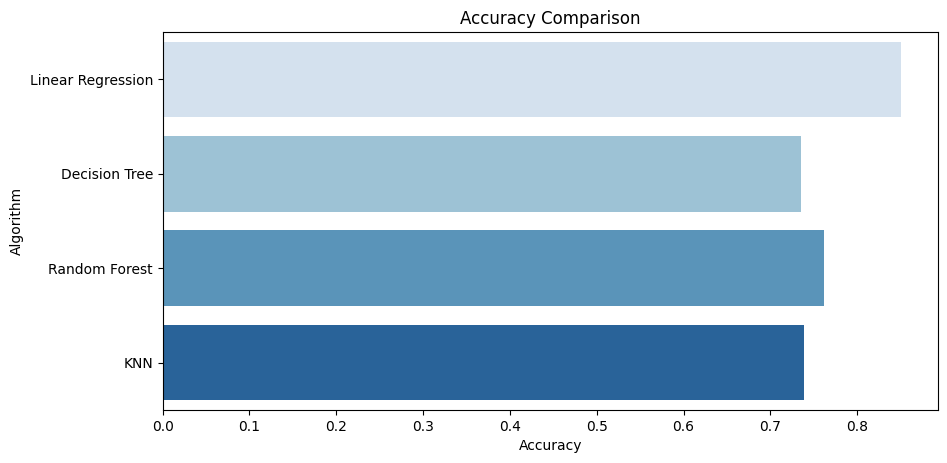

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='Blues')


In [ ]:
error_models = dict(zip(model, err))
for k, v in error_models.items():
    print (k, '-->', v)

Linear Regression --> 6862864.418959247
Decision Tree --> 11891572.637518585
Random Forest --> 8088836.187746989
KNN --> 11974670.243468769


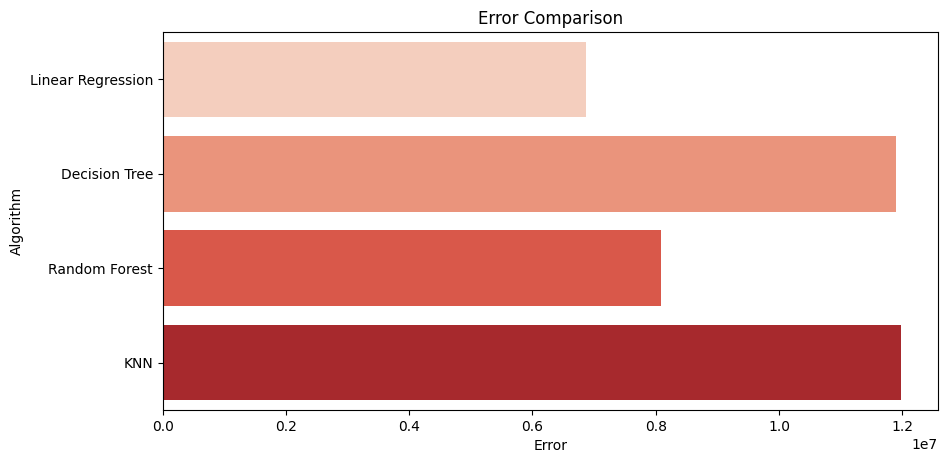

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Error Comparison')
plt.xlabel('Error')
plt.ylabel('Algorithm')
sns.barplot(x = err,y = model,palette='Reds')